In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
Xs = []
with open("hw7t3v2.txt") as f:
    for X in f.readlines():
        Xs.append(map(float, X[:-1].split()[1:]))

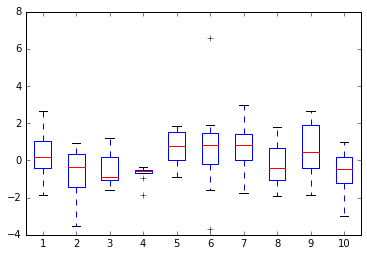

In [3]:
plt.boxplot(Xs);

По графику, кажется, что выборки далеки от однородных.

In [4]:
k = len(Xs)
ns = map(len, Xs)
N = sum(ns)

Проверим условия применимости критерия Фишера (однофакторного дисп. анализа).

1ый вариант.

In [5]:
len(set(ns)) == 1

False

2ой вариант.

In [6]:
condition1 = N - k - 1 >= 20
vars_ = map(lambda X: np.var(X) * len(X) / (len(X) - 1), Xs)
condition2 = max(vars_) / min(vars_) < 10
condition1 and condition2

False

Т.о. образом условия применимости критерия Фишера не выполнены.

Т.к. выборки независимы (дано в условии), то можем применить критерий Краскела-Уоллиса.

In [7]:
sps.kruskal(*Xs)

KruskalResult(statistic=22.183566141413582, pvalue=0.0083150567181897797)

Как и предположили в начале, гипотеза об отсутствии сдвига отклоняется на уровне значимости 0.01.